# Vocabulary Analysis Workshop

## Visualizing

An important part of exploring a data set is producing easy to understand visualizations that describe or summarize the data. With structured data we have many well known visualizations like scatter plots, pie charts, bar charts, etc. How can we use some of these with our vocabulary analysis? Are there any ways we can characterize our data that are especially suited for text?

In [1]:
from __future__ import division, print_function

%matplotlib inline

from matplotlib import pyplot as plt
import pandas as pd
import pickle

from vocab_analysis import *

import answers

In [2]:
jobs_df = pd.read_pickle('./data/tokenized.pickle')

In [3]:
jobs_df.head()

,description,experience,education,is_hourly,is_part_time,is_supervisor,tokens
id,,,,,,,
0,THE COMPANY Employer is a midstream service...,5+,none,False,False,True,"[THE, COMPANY, Employer, is, a, midstream, ser..."
1,ICR Staffing is now accepting resumes for Indu...,2-5,none,False,False,False,"[ICR, Staffing, is, now, accepting, resumes, f..."
2,This is a great position for the right person....,none,none,False,True,False,"[This, is, a, great, position, for, the, right..."
3,A large multi-specialty health center is expan...,none,none,False,False,False,"[A, large, multi, -, specialty, health, center..."
4,JOB PURPOSE: The Account Director is respon...,5+,bs-degree-needed,False,False,True,"[JOB, PURPOSE, :, The, Account, Director, is, ..."


We know that we have segments to our data. Ultimately, we will be trying to create models to predict membership in these segments.

In [4]:
segments = [
    pd.Series(jobs_df['experience'] == '5+', name='5+ years experience'),
    pd.Series(jobs_df['experience'] == '2-5', name='2-5 years experience'),
    pd.Series(jobs_df['experience'] == '1-2', name='1-2 years experience'),
    pd.Series(jobs_df['education'] == 'ms-or-phd-needed', name='Master\'s Degree or PhD'),
    pd.Series(jobs_df['education'] == 'bs-degree-needed', name='Bachelor\'s Degree'),
    pd.Series(jobs_df['education'] == 'associate-needed', name='Associate\'s Degree'),
    pd.Series(jobs_df['is_hourly'], name='Hourly'),
    pd.Series(jobs_df['is_part_time'], name='Part-time'),
    pd.Series(jobs_df['is_supervisor'], name='Supervising'),
]

Let's pickle these for future use.

In [5]:
with open('./data/segments.pickle', 'wb') as fp:
    pickle.dump(segments, fp)

First let's look at the distribution of $\sum_{d \in D}{\mbox{TF}(t, d)}$ vs $\mbox{IDF}(t)$

In [6]:
avg_tfidf_df = calculate_avg_tfidf(jobs_df['tokens'])

In [7]:
avg_tfidf_df.head()

,avg_tfidf,idf,sum_tf
!,1.237900,2.428616,2230
"""",0.727866,3.845912,828
#,0.215198,4.878190,193
$,0.075590,7.349056,45
$.,0.002765,12.095397,1


One way we can visualize the data is to look at the distribution of $\mbox{TF}$ vs $\mbox{IDF}$

In [8]:
def plot_tfidf_freqs(avg_tfidf_df, n, title='sum TF vs IDF', ax=None):
    if ax is None:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111)
        
    ax.scatter(avg_tfidf_df.sum_tf, avg_tfidf_df.idf, c=avg_tfidf_df.avg_tfidf, cmap=plt.cm.coolwarm)
    ax.set_xbound(0, avg_tfidf_df.sum_tf.max())
    ax.set_ybound(0, avg_tfidf_df.idf.max())
    ax.set_xlabel('sum TF')
    ax.set_ylabel('IDF')
    ax.set_title(title)

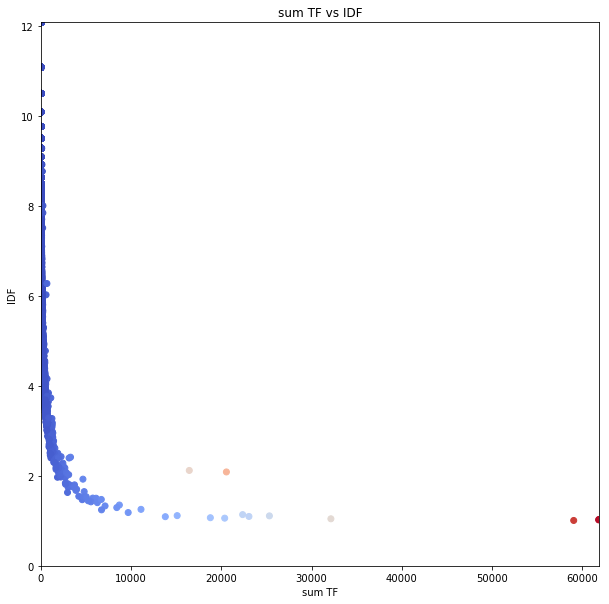

In [9]:
plot_tfidf_freqs(avg_tfidf_df, len(jobs_df))

In [10]:
avg_tfidf_df.query('sum_tf > 20000')

,avg_tfidf,idf,sum_tf
",",14.572458,1.030976,61839
-,5.820190,1.139197,22352
.,13.614096,1.008819,59041
a,4.933866,1.060095,20362
and,14.432160,1.021578,61807
of,5.785711,1.098156,23050
the,6.428974,1.110939,25318
to,7.681988,1.045957,32132
•,9.810510,2.088409,20552


In [11]:
avg_tfidf_df.query('sum_tf > 10000 and idf > 2')

,avg_tfidf,idf,sum_tf
*,7.972788,2.121841,16439
•,9.810510,2.088409,20552


It seems that our formulation of $\mbox{TF.IDF}$ has a limitation: some of our vocabulary have such high $\mbox{TF}$ that the $\mbox{IDF}$ does not matter.

#### Wordclouds

Word clouds are an easy to digest visualization that is especially suited for text.

To produce a wordcloud you need your vocabulary and an associated weight. Sometimes this is just the occurrences in a document or corpus ($\mbox{n_t}$ from our $\mbox{TF.IDF}$ formula). We will be using average $\mbox{TF.IDF}$, but let's also look at the wordclouds for $\mbox{TF}$ and $\mbox{IDF}$ for the tokens.

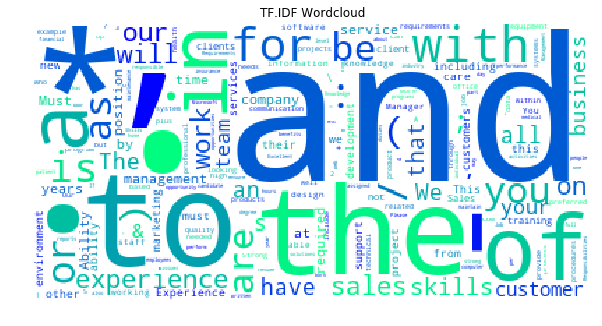

In [12]:
wordcloud(avg_tfidf_df['avg_tfidf'])

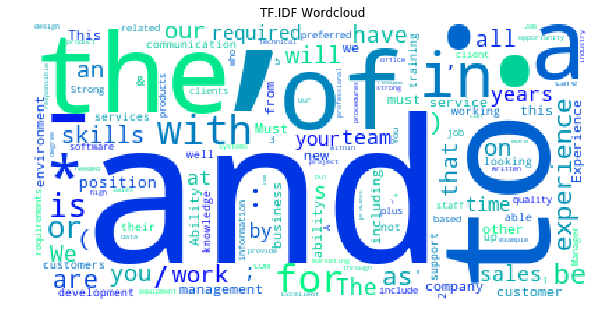

In [13]:
wordcloud(avg_tfidf_df['sum_tf'])

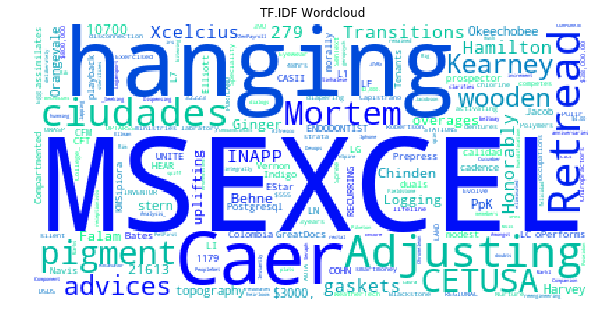

In [14]:
wordcloud(avg_tfidf_df['idf'])

We should also look at the wordclouds by segment. In order to make these visualization easier to use, a helper function has been included in `vocab_analysis.py` which calculates $\mbox{TF.IDF}$ and produces the scatter plot of $\mbox{TF}$ vs $\mbox{IDF}$, and $\mbox{TF.IDF}$ based wordclouds for the overall corpus as well as each segment.

generating plot 1 / 11
generating plot 2 / 11
generating plot 3 / 11
generating plot 4 / 11
generating plot 5 / 11
generating plot 6 / 11
generating plot 7 / 11
generating plot 8 / 11
generating plot 9 / 11
generating plot 10 / 11
generating plot 11 / 11

('Number of terms: ', 35005)


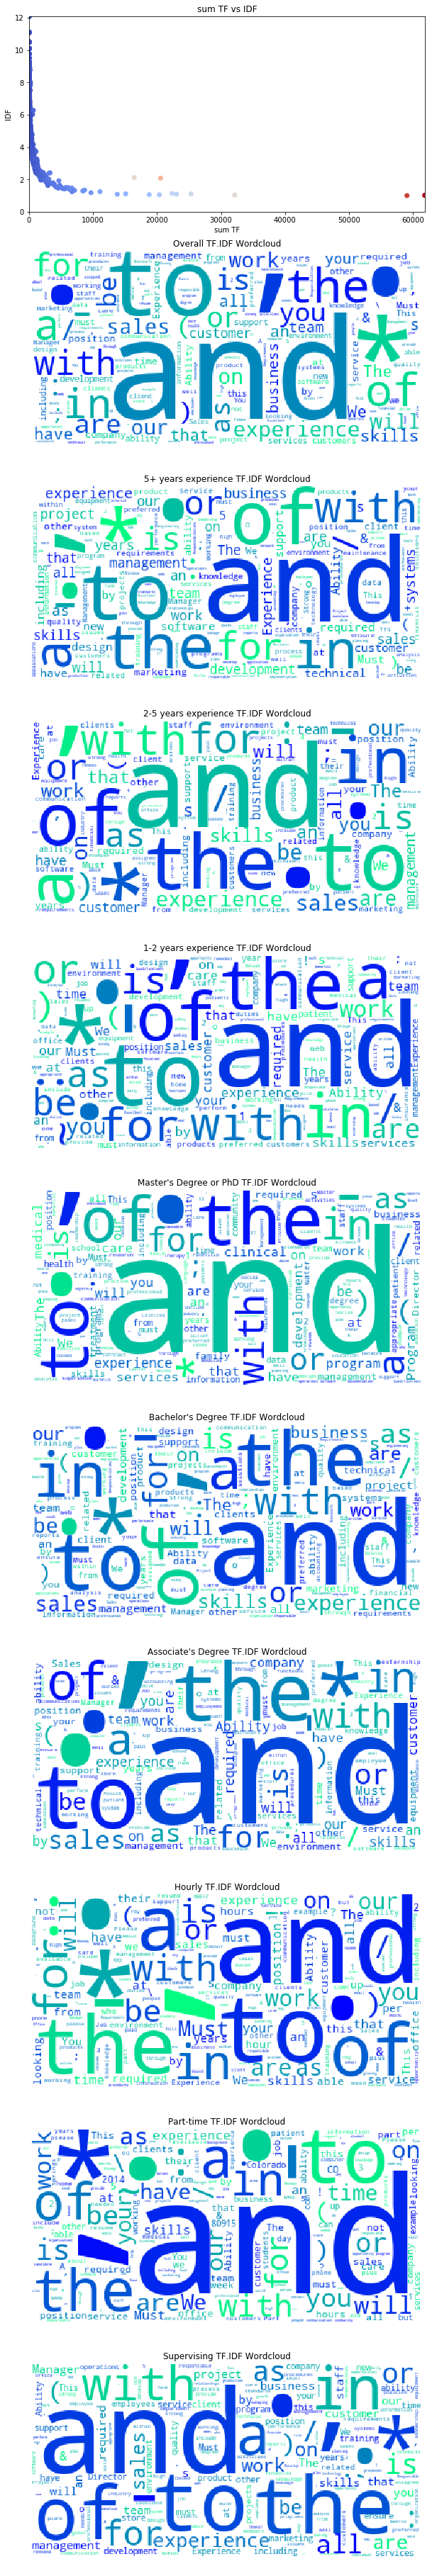

In [15]:
analyze(jobs_df, 'tokens', segments)

Let's turn our attention to improving our processing. We need to do something to deal with how messy our tokens are.

### NEXT => [4. Stemming and Lemmatization](4. Stemming and Lemmatization.ipynb)